In [9]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

task_name = "sst"

fname_short = f"faithfulness_metrics/{task_name}/topk-test-faithfulness-metrics-description.json"

with open(fname_short, "r") as file : data = json.load(file) 

In [10]:
# z = {k: v.update({"comprehensiveness" : v}) for k,v in data.items()}
means = {k:{"comprehensiveness":data[k]["comprehensiveness"]["mean"], "sufficiency":data[k]["sufficiency"]["mean"]}  for k,v in data.items()}

In [11]:
df = pd.DataFrame(means).T.round(2)

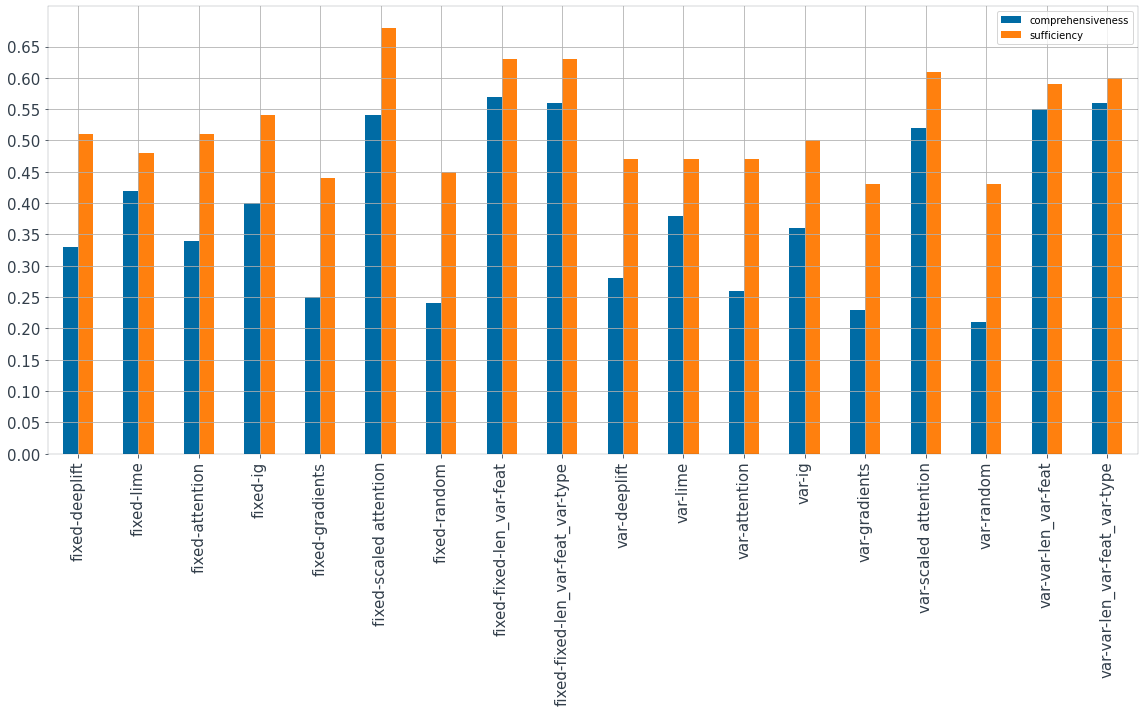

In [12]:
plt.style.use('tableau-colorblind10')
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.2
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams["font.variant"] = "small-caps"

fig, ax = plt.subplots(figsize = (16,10))


df.plot.bar(ax = ax)

plt.yticks(np.arange(0., df.max().max()+0.02, 0.05), fontsize = 15)
plt.xticks(fontsize=15)
plt.grid()
plt.tight_layout()


fig.savefig(f"graphs_and_tables/plots/{task_name}-comp-suff.png", dpi = 300)#, bbox_inches="tight")
